In [1]:
210*(0.01**4)*(0.99**6)

1.9771083137421e-06

In [2]:
210/1024

0.205078125

In [3]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

In [4]:
def L(x):
    return -210*(x**4)*(1-x)**6

In [5]:
L(0.01)

-1.9771083137421e-06

In [6]:
L(0.5)

-0.205078125

In [7]:
sp.optimize.minimize(L, x0=0.1)

      fun: -0.25082265599999987
 hess_inv: array([[0.09570267]])
      jac: array([3.7252903e-09])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([0.39999999])

In [8]:
sample = sp.stats.norm.rvs(loc=50,scale=10,size=10)
sample

array([49.52830405, 61.8416655 , 41.43256942, 39.18364438, 47.72046143,
       28.11645667, 46.99364886, 59.33541713, 39.77239227, 42.92556805])

In [9]:
sample.mean()

45.68501277625727

In [10]:
sample.mean()-1.96*np.sqrt(10), sample.mean()+1.96*np.sqrt(10)

(39.48694856232724, 51.88307699018729)

In [11]:
lw = sample.mean()-1.96*np.sqrt(10)
up = sample.mean()+1.96*np.sqrt(10)

lw,up

(39.48694856232724, 51.88307699018729)

In [12]:
True*True

1

In [13]:
result = []
for i in range(10000):
    sample = sp.stats.norm.rvs(loc=50,scale=10,size=10)
    lw = sample.mean()-1.96*np.sqrt(10)
    up = sample.mean()+1.96*np.sqrt(10)
    result.append((lw<50)*(50<up))

In [14]:
np.mean(result)

0.9519

In [15]:
#母平均の区間推定
weight = np.array([12,13,12,17,10,14,18,9,12])

In [35]:
weight.mean(), weight.std(ddof=1),

(13.0, 2.958039891549808)

In [17]:
xbar = weight.mean()
s = weight.std(ddof=1)
n = len(weight)

In [18]:
sp.stats.norm.ppf(q=0.975,loc=0,scale=1)

1.959963984540054

In [19]:
sp.stats.t.ppf(q=0.975, df=n-1)

2.3060041350333704

In [20]:
xbar - 1.96*s/np.sqrt(n),xbar + 1.96*s/np.sqrt(n)

(11.067413937520792, 14.932586062479208)

In [21]:
xbar - sp.stats.t.ppf(q=0.975, df=n-1)*s/np.sqrt(n),xbar + sp.stats.t.ppf(q=0.975, df=n-1)*s/np.sqrt(n)

(10.726249259497493, 15.273750740502507)

In [22]:
import pandas as pd
drink = pd.read_csv("./data/drink_t.csv", encoding="cp932")
drink

,A,B
0,10.1,5.2
1,11.2,4.5
2,12.5,10.3
3,10.2,11.1
4,5.1,7.2
5,6.7,9.8
6,8.1,6.5
7,9.9,4.5
8,10.3,6.8
9,11.4,5.4


In [23]:
A = drink['A'].values
B = drink['B'].values

In [24]:
A.mean()-B.mean()

2.420000000000001

In [25]:
import pingouin as pg

In [26]:
#CI95% が95信頼区間
#correction=True 等分散仮説なし
pg.ttest(x=A,y=B,correction=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.292538,17.894071,two-sided,0.034216,"[0.2, 4.64]",1.025254,2.192,0.582919


In [39]:
# CI95%
A.mean()-B.mean() + sp.stats.t.ppf(q=0.975,df=17.89)*np.sqrt(A.var(ddof=1)/10+B.var(ddof=1)/10)
# CI95%
A.mean()-B.mean() - sp.stats.t.ppf(q=0.975,df=17.89)*np.sqrt(A.var(ddof=1)/10+B.var(ddof=1)/10)

0.20129131832953506

In [27]:
stock = pd.read_csv('./data/price.csv')
stock

,day,price
0,1,190
1,2,200
2,3,230
3,4,200
4,5,230
5,6,250
6,7,220
7,8,190
8,9,200
9,10,210


In [29]:
price = stock['price']
price.mean(),price.var(ddof=1),price.std(ddof=1)
#標本分散 395 標本偏差19

(212.0, 395.55555555555554, 19.888578520235065)

In [30]:
s2 = price.var(ddof=1)
n = len(price)

In [31]:
sp.stats.chi2.ppf(q=0.025,df=n-1),sp.stats.chi2.ppf(q=0.975,df=n-1)

(2.7003894999803584, 19.02276779864163)

In [33]:
#95%　母分散
(n-1)*s2/sp.stats.chi2.ppf(q=0.975,df=n-1),(n-1)*s2/sp.stats.chi2.ppf(q=0.025,df=n-1)

(187.14416522784927, 1318.3283374586867)

In [34]:
#95 標準偏差
np.sqrt((n-1)*s2/sp.stats.chi2.ppf(q=0.975,df=n-1)),np.sqrt((n-1)*s2/sp.stats.chi2.ppf(q=0.025,df=n-1))

(13.6800645184096, 36.30879146238121)

In [41]:
#母比率
n = 1000
p = 100/n

In [42]:
p - 1.96*np.sqrt(p*(1-p)/n),p + 1.96*np.sqrt(p*(1-p)/n)

(0.08140580735820993, 0.11859419264179008)

In [50]:
#母平均の検定

xbar = 139.5
s = 20
n = 100

mu0 = 135

In [52]:
t = (xbar - mu0)/(s/np.sqrt(n))
t

2.25

In [53]:
#p-value
1-sp.stats.t.cdf(x=t,df=n-1)

0.013331186128795025

In [54]:
sp.stats.t.ppf(q=0.95, df=n-1)

1.6603911559963895

In [59]:
for n in range(100):
    print(n+1,sp.stats.t.ppf(q=0.95, df=n+1)) 

1 6.313751514800932
2 2.919985580355516
3 2.3533634348018264
4 2.13184678133629
5 2.015048372669157
6 1.9431802803927816
7 1.894578605061305
8 1.8595480375228424
9 1.8331129326536335
10 1.8124611228107335
11 1.7958848187036691
12 1.782287555649159
13 1.7709333959867988
14 1.7613101357748562
15 1.7530503556925547
16 1.74588367627624
17 1.7396067260750672
18 1.7340636066175354
19 1.729132811521367
20 1.7247182429207857
21 1.7207429028118775
22 1.717144374380242
23 1.7138715277470473
24 1.7108820799094275
25 1.7081407612518986
26 1.7056179197592727
27 1.7032884457221265
28 1.701130934265931
29 1.6991270265334972
30 1.6972608943617378
31 1.6955187891366663
32 1.6938887423906548
33 1.6923603038977453
34 1.6909242507706543
35 1.6895724539637709
36 1.6882977108049164
37 1.6870936167109873
38 1.685954457643814
39 1.6848751194973992
40 1.68385101138658
41 1.6828780004112913
42 1.6819523559426
43 1.681070701847763
44 1.6802299753652514
45 1.6794273915744247
46 1.67866041259169
47 1.6779267207755

In [62]:
#母平均の差の検定
d = pd.read_csv('./data/tokyo_osaka_salary.csv',encoding='cp932', skiprows=1)

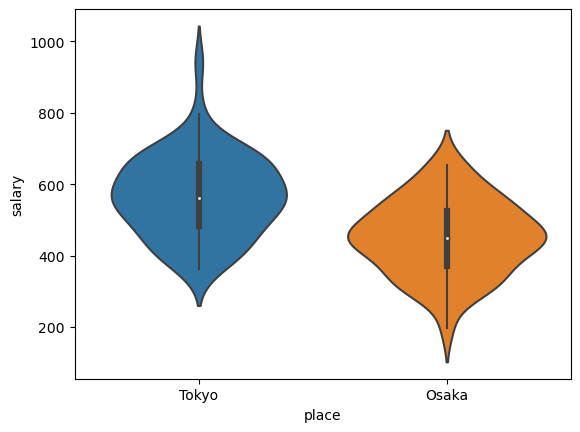

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(x='place', y='salary', data=d)
plt.show()

In [65]:
d.groupby(['place']).mean()

,number,salary
place,,
Osaka,80.0,451.504444
Tokyo,29.0,567.307018


In [68]:
tokyo = d.salary[d.place=='Tokyo']
osaka = d.salary[d.place=='Osaka']

In [69]:
pg.ttest(x=tokyo, y=osaka, correction=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.391759,98.120125,two-sided,4.817719e-07,"[73.18, 158.42]",1.06244,2.809e+04,0.999544


In [70]:
#tokyoの母平均が500より高いかの検定
pg.ttest(x=tokyo, y=500, alternative='greater',correction=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.47098,56,greater,0.000019,"[542.13, inf]",0.592196,1064.728,0.997208


In [73]:
cross = np.array([[60,30,10],[20,40,40]])
sp.stats.chi2_contingency(cross)


(39.42857142857143,
 2.7428022661917792e-09,
 2,
 array([[40., 35., 25.],
        [40., 35., 25.]]))